In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, cross_validation, neighbors
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split

/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
cdf = pd.read_csv('ddf_final_without_scores.csv')
numeric_predictors = ['result', 'elo', 'opp_elo', 'diff', 'color',
                      'game_time', 'start_time', 'weekday', 'day']
cdf = cdf[numeric_predictors]
cdf = cdf[cdf['result']!=0.5]
all_x = cdf.iloc[:,1:].values
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 0 to 1808
Data columns (total 9 columns):
result        1703 non-null float64
elo           1703 non-null float64
opp_elo       1703 non-null float64
diff          1703 non-null int64
color         1703 non-null int64
game_time     1703 non-null int64
start_time    1703 non-null float64
weekday       1703 non-null int64
day           1703 non-null int64
dtypes: float64(4), int64(5)
memory usage: 133.0 KB


In [4]:
y = cdf['result']
X = all_x

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

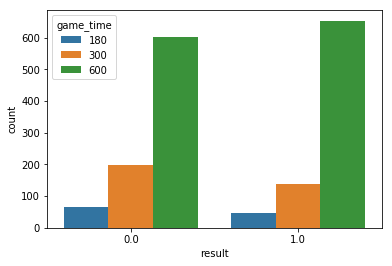

In [55]:
sns.countplot(x='result', hue='game_time', data=cdf)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=26)

In [71]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
logreg.score(X_test, y_test)

0.7201565557729941

In [73]:
logreg.score(X_train, y_train)

0.700503355704698

In [167]:
logreg100 = LogisticRegression(
    penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, 
    intercept_scaling=1, class_weight=None, random_state=26, 
    solver='liblinear', max_iter=10000, multi_class='ovr', verbose=0, 
    warm_start=False, n_jobs=1)

logreg100.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=26, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
logreg100.score(X_test, y_test)

0.7181996086105675

In [169]:
logreg100.score(X_train, y_train)

0.7013422818791947

In [77]:
logreg001 = LogisticRegression(C=.01)
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
logreg001.score(X_test, y_test)

0.7103718199608611

In [79]:
logreg001.score(X_train, y_train)

0.6988255033557047

In [66]:
predictions = logreg.predict(X_test)

In [67]:
classification_report(y_test,predictions)

'             precision    recall  f1-score   support\n\n        0.0       0.72      0.73      0.72       253\n        1.0       0.73      0.72      0.73       258\n\navg / total       0.72      0.72      0.72       511\n'

In [68]:
confusion_matrix(y_test,predictions)

array([[184,  69],
       [ 72, 186]])

In [69]:
accuracy_score(y_test,predictions)

0.7240704500978473

In [396]:
clf = SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.0001, max_iter=500, tol=0, 
                    epsilon=0.01, n_jobs=10, random_state=88, class_weight=None)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.01,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_hinge', max_iter=500,
       n_iter=None, n_jobs=10, penalty='l2', power_t=0.5, random_state=88,
       shuffle=True, tol=0, verbose=0, warm_start=False)

In [397]:
clf.score(X_test, y_test)

0.6829745596868885

In [398]:
clf.score(X_train, y_train)

0.6854026845637584